<a href="https://colab.research.google.com/github/ritzi12/pnn_probab_neural_net/blob/main/PNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Neural Networks (PNN) for Classifications

Detailed Article Written by me - [Blog](https://www.analyticsvidhya.com/blog/2023/04/bayesian-networks-probabilistic-neural-network-pnn/)


## Learning Objectives

1. Understanding PNN and its related concepts
2. Concepts of Parzen Window or KDE(kernel density estimate)
3. Kernel functions as non-parametric method to ascertain data distribution through an example.
4. Implementation of PNN using python for classification tasks


In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

# Load Data

In [3]:
iris = load_iris();
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']);
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# Kernel Functions

Kernel density estimation(KDE) is analogous to histograms, where we calculate the sum of a gaussian bell computed around every data point. A KDE is a sum of different parametric distributions produced by each observation point given some parameters.

In [4]:
uniform = lambda x,b: (np.abs(x/b) <= 1) and 1/2 or 0
triangle = lambda x,b: (np.abs(x/b) <= 1) and  (1 - np.abs(x/b)) or 0
gaussian = lambda x,b: (1.0/np.sqrt(2*np.pi))* np.exp(-.5*(x/b)**2)
laplacian = lambda x,b: (1.0/(2*b))* np.exp(-np.abs(x/b))
epanechnikov = lambda x,b: (np.abs(x/b)<=1) and ((3/4)*(1-(x/b)**2)) or 0

kernel_estimator = lambda n,l,b: (1/n*b)*np.sum(l);

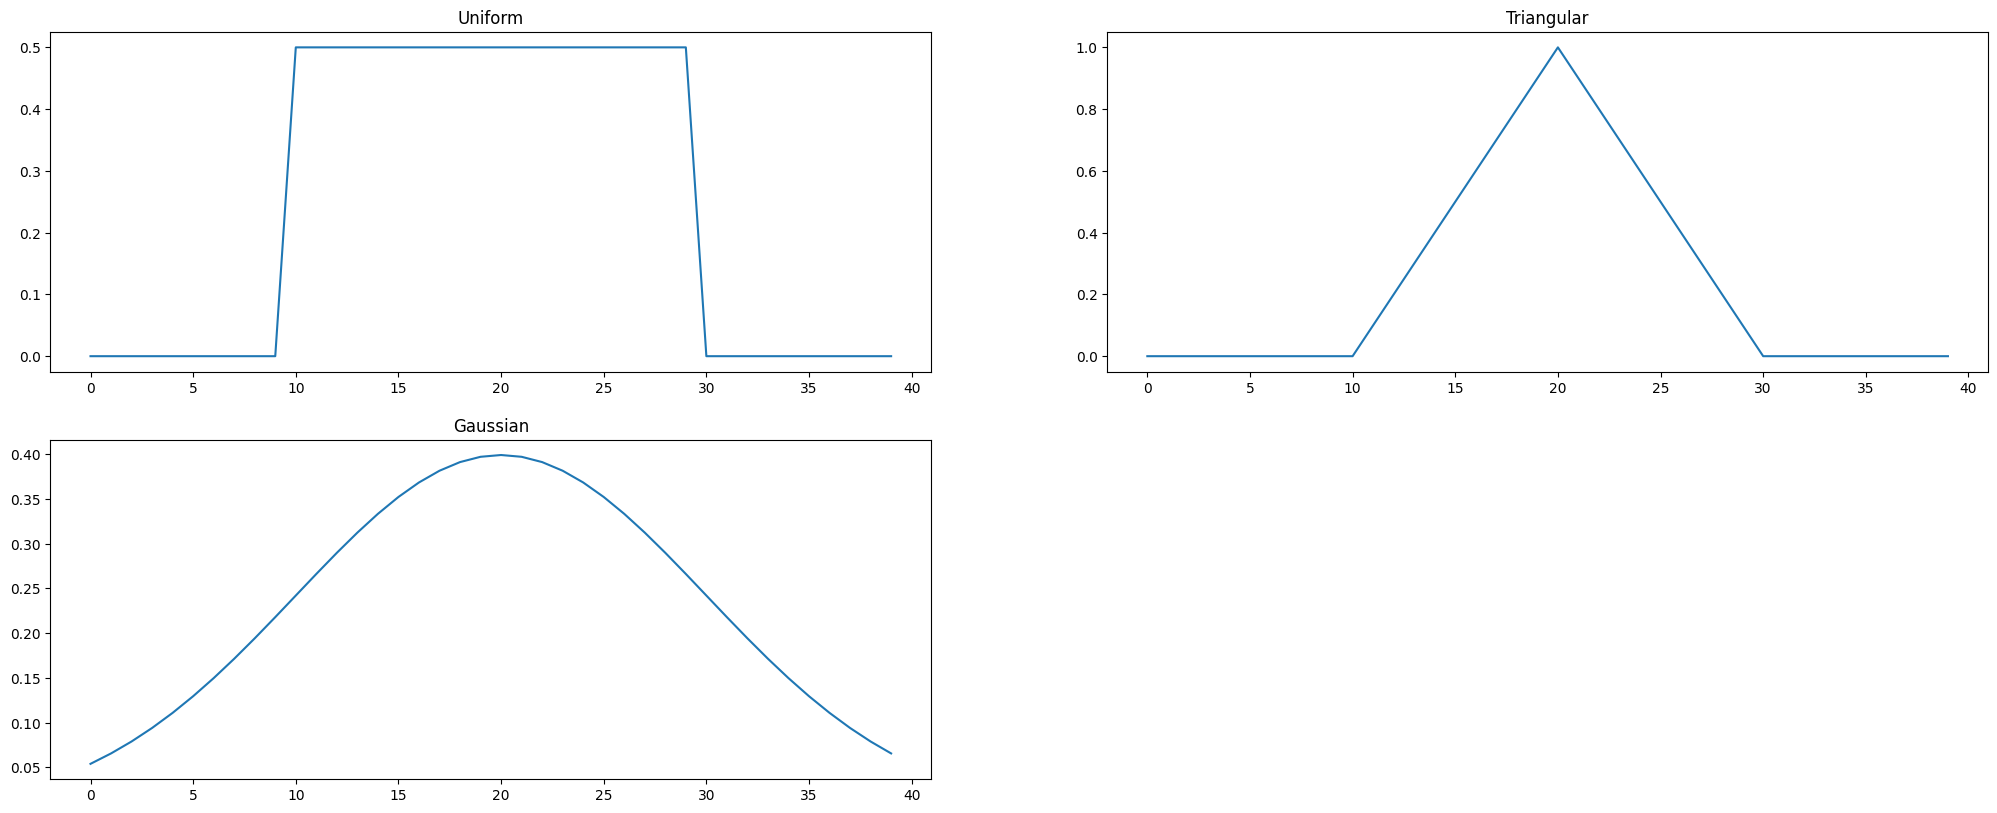

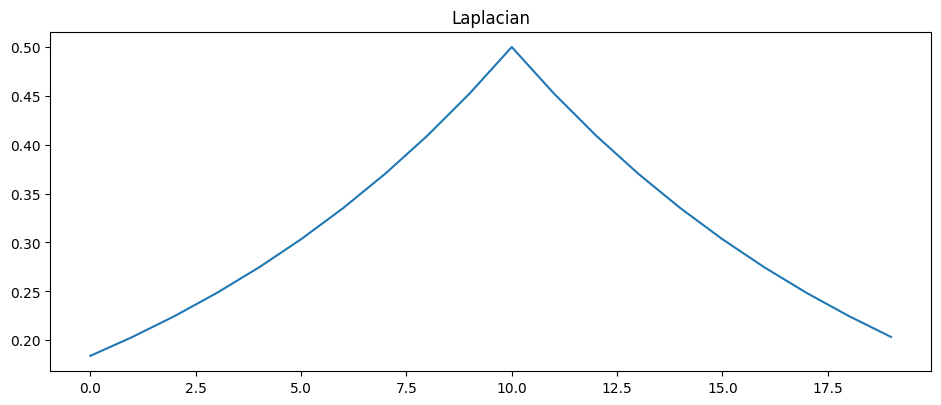

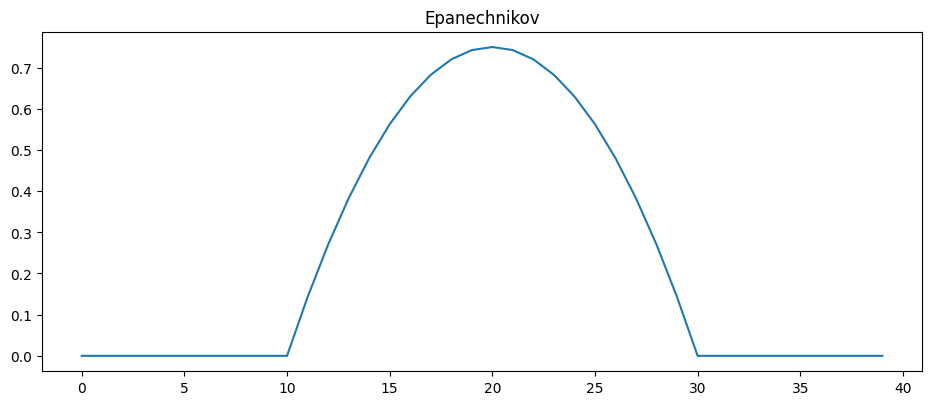

In [5]:
# some sample kernel that can be run with a parzen window
plt.rcParams['figure.figsize'] = [25, 15]
plt.subplot(3, 2, 1)
plt.title('Uniform')
plt.plot([uniform(i,1) for i in np.arange(-2, 2, 0.1)])

plt.subplot(3, 2, 2)
plt.title('Triangular')
plt.plot([triangle(i,1) for i in np.arange(-2, 2, 0.1)])

plt.subplot(3, 2, 3)
plt.title('Gaussian')
plt.plot([gaussian(i,1) for i in np.arange(-2, 2, 0.1)])
plt.show()

plt.subplot(3, 2, 4)
plt.title('Laplacian')
plt.plot([laplacian(i,1) for i in np.arange(-1, 1, 0.1)])
plt.show()

plt.subplot(3, 2, 5)
plt.title('Epanechnikov')
plt.plot([epanechnikov(i,1) for i in np.arange(-2, 2, 0.1)])
plt.show()

## Distribution of Sepals Based on Classes

Now we will see a distribution of the “sepal length” feature of Iris Dataset and its corresponding kde.

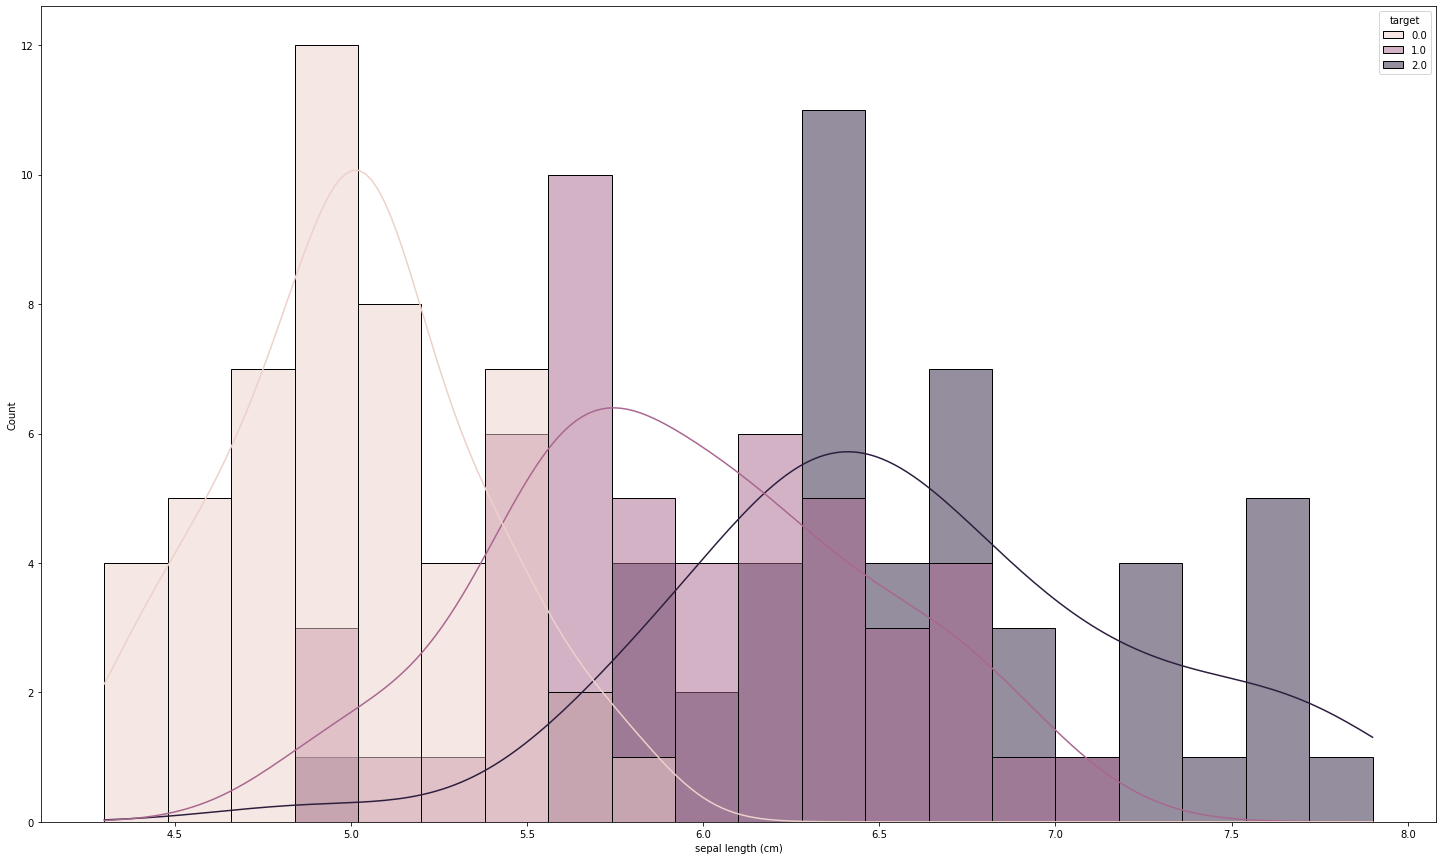

In [ ]:
sns.histplot(x=data['sepal length (cm)'],bins= 20,kde=True,hue =data['target'] )#,20, density=True)
#sns.kdeplot(x=data['sepal length (cm)'],hue=data['target'], fill=True)
plt.show()

## Distribution of Sepal Length without Class

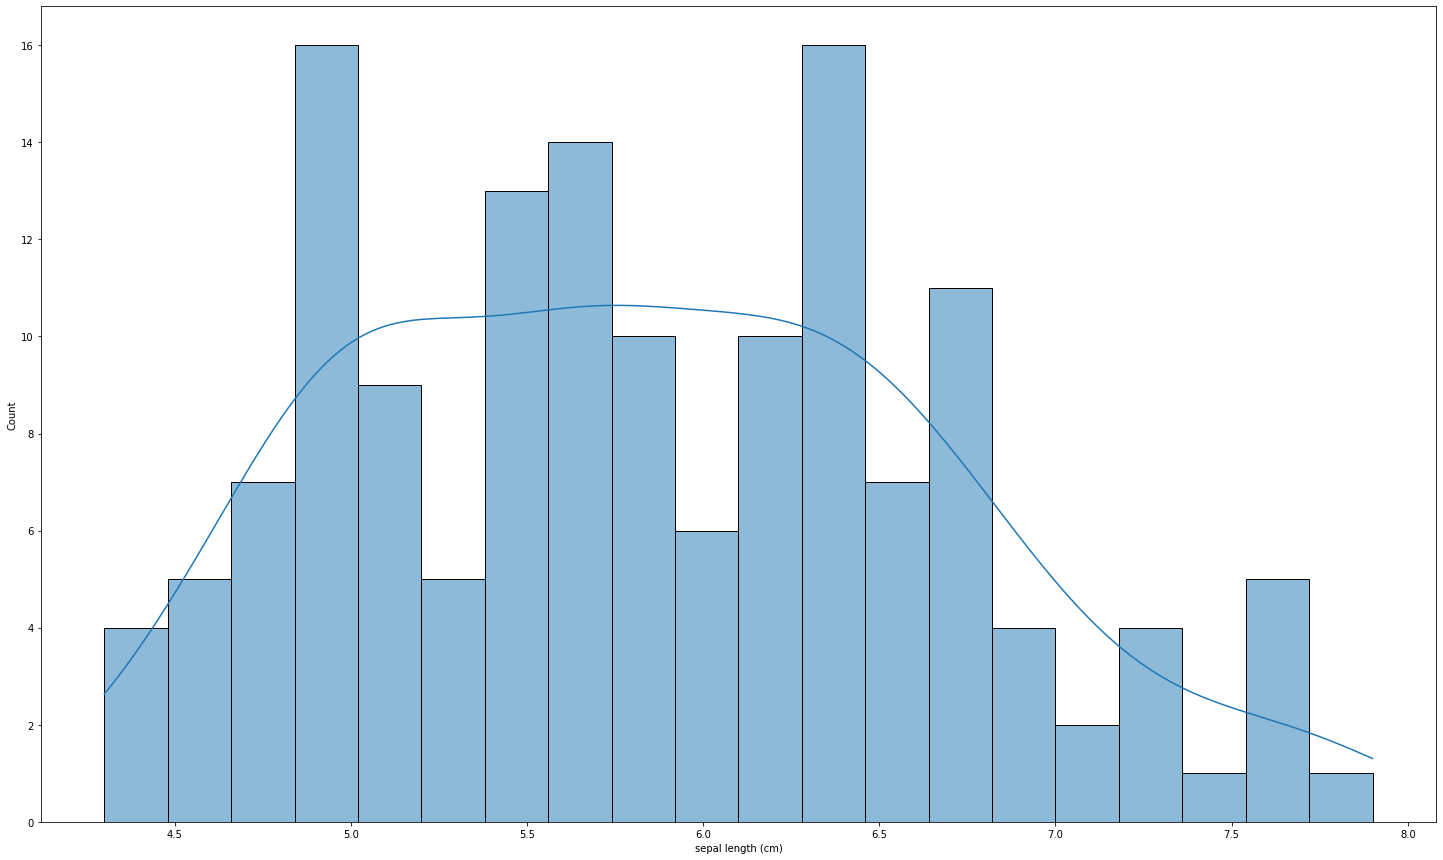

In [ ]:
#sns.kdeplot(x=data['sepal length (cm)'], fill=True)
sns.histplot(x=data['sepal length (cm)'],bins= 20,kde=True)#,20, density=True)
plt.show()

## Using Kernel Functions to estimate the distributions

Now using the above-mentioned kernel functions, we will try to build kernel density estimate for sepal length for different values of smoothing parameter(bandwidth).




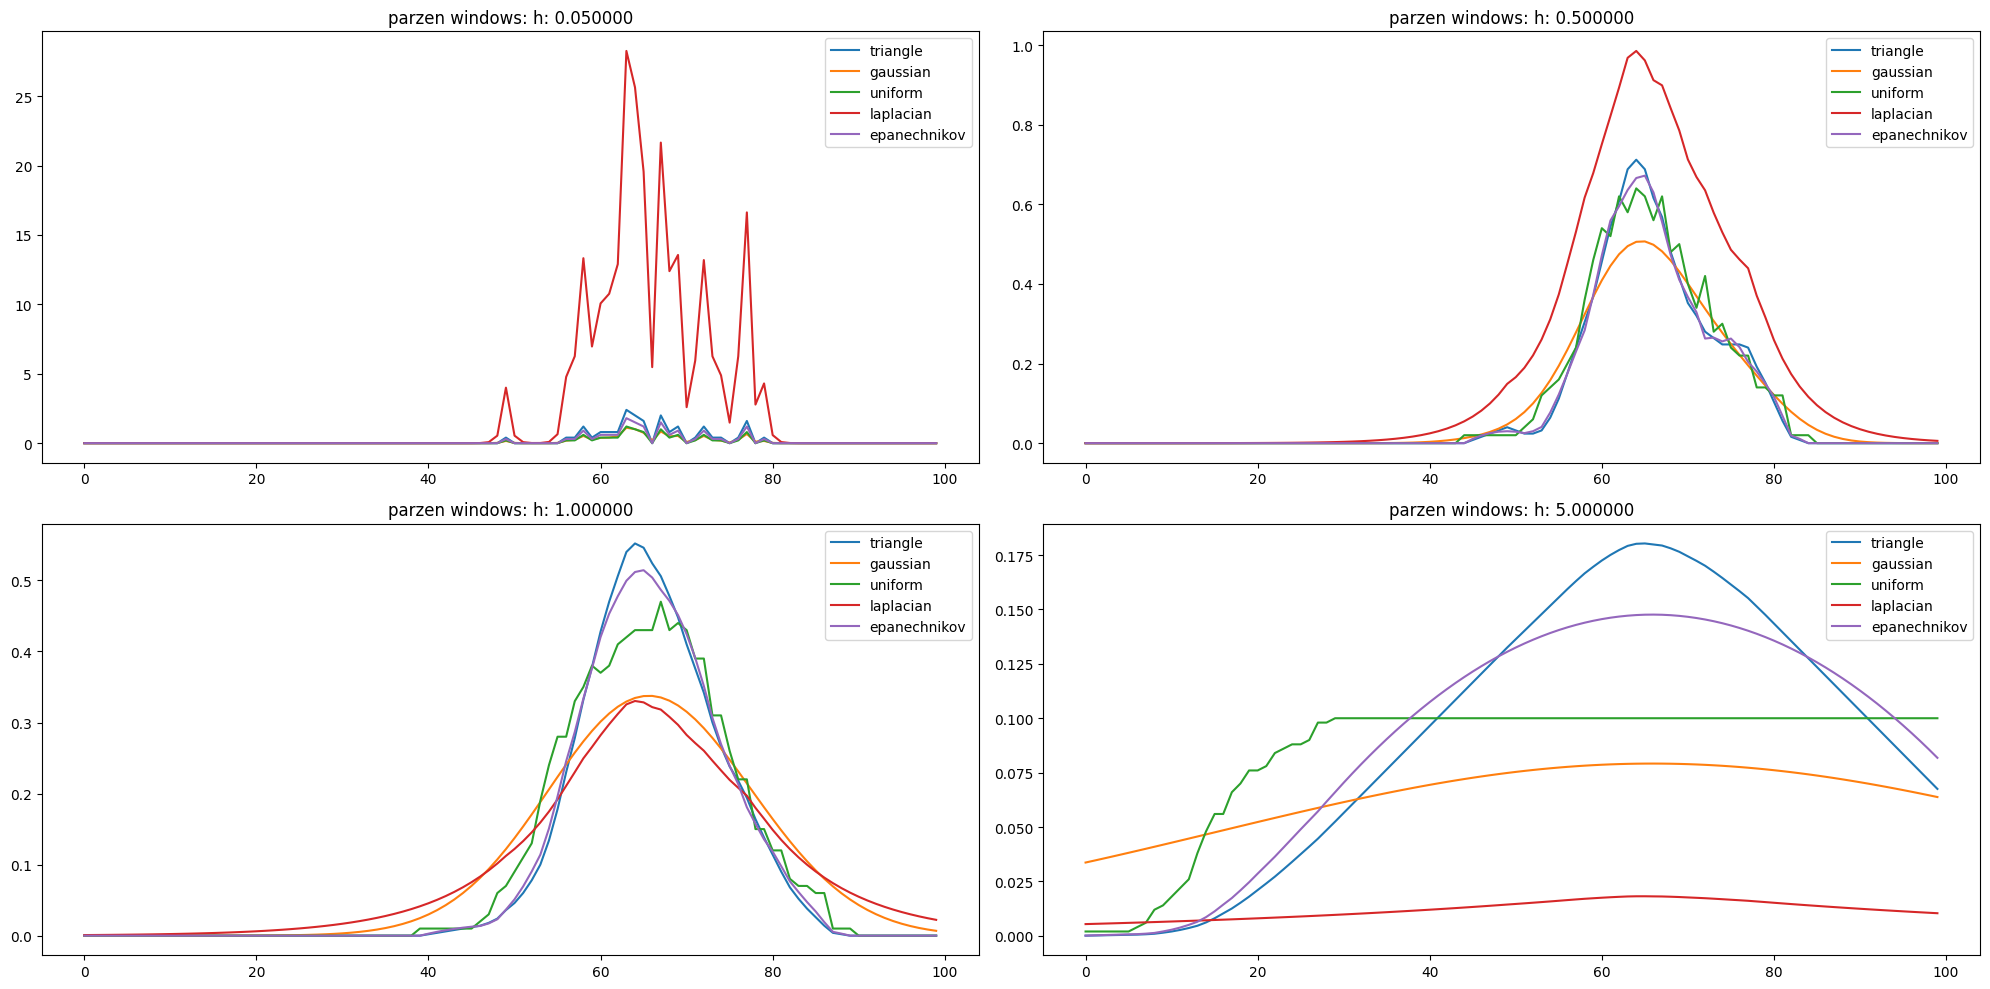

In [6]:
# applying the window over a random distributio.
# A large value of h will obscure a lot of major features of the structure while a small h is highly suceptible to noise.
## Applying Only For class 2 distribution of Sepal Length
inp = data.loc[data['target']==2,'sepal length (cm)']
for i,b in enumerate([.05,.5,1,5]):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.subplot(221 + i)
    plt.plot([(1.0/(len(inp)*b))*np.sum([triangle((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="triangle")
    plt.plot([(1.0/(len(inp)*b))*np.sum([gaussian((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="gaussian")
    plt.plot([(1.0/(len(inp)*b))*np.sum([uniform((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="uniform")
    plt.plot([(1.0/(len(inp)*b))*np.sum([laplacian((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="laplacian")
    plt.plot([(1.0/(len(inp)*b))*np.sum([epanechnikov((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="epanechnikov")
    plt.legend()
    plt.title('parzen windows: h: %f' % (b))

plt.tight_layout()
plt.show()


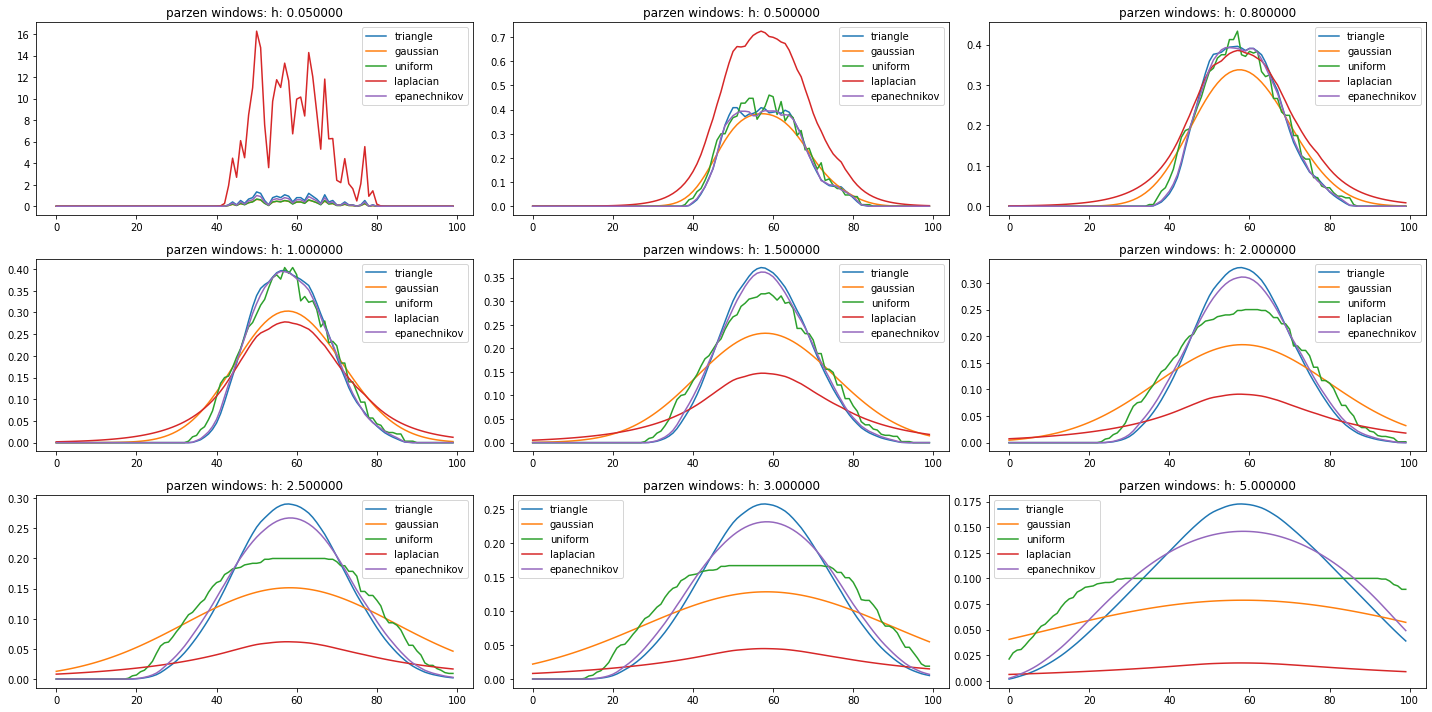

In [ ]:
## Applying  For all class distribution of Sepal Length
plt.rcParams['figure.figsize'] = [40, 5]

inp = data['sepal length (cm)']
for i,b in enumerate([.05,.5,0.8,1,1.5,2,2.5,3,5]):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.subplot(331 + i)
    plt.plot([(1.0/(len(inp)*b))*np.sum([triangle((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="triangle")
    plt.plot([(1.0/(len(inp)*b))*np.sum([gaussian((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="gaussian")
    plt.plot([(1.0/(len(inp)*b))*np.sum([uniform((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="uniform")
    plt.plot([(1.0/(len(inp)*b))*np.sum([laplacian((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="laplacian")
    plt.plot([(1.0/(len(inp)*b))*np.sum([epanechnikov((ln - d),b) for d in inp]) for ln in np.arange(0, 10, 0.1)],label="epanechnikov")
    plt.legend()
    plt.title('parzen windows: h: %f' % (b))

plt.tight_layout()
plt.show()


As we can see, triangle, gaussian, and epanechnikov give better approximations at 0.8 and 1.0 bandwidth values. As we increase, the bandwidth curve becomes more smooth and flattened, and if we decrease, the bandwidth curve becomes more zigzag and sharp-edged. Thus, bandwidth in PNN can be considered similar to the k value in KNN. *(in above plots for all class)*

# Probabilistic Neural Network
Here we build a PNN model consisting of 4 layers.
1. Input
2. Pattern Layer
3. Summation Layer
4. Output Layer



### Algorithm of PNN

The following are the high-level steps of the PNN algorithm:

1.  Standardize the input features and feed them to the input layer.

2. In the pattern Layer, each training observation forms one neuron and kernel with a specific smoothing parameter/bandwidth value used as an activation function. For each input observation, we find the kernel function value K(x,y) from each pattern neuron, i.e., training observation.

3. Then sum up the K(x,y) values for patterns in the same class in the summation layer. Also, take an average of these values. Thus, the number of outputs for this layer equals the number of classes in the “target” variable.

4. The final layer output layer compares the output of the preceding layer, i.e., the summation layer. It checks the maximum output for which class label is based on average K(x,y) values for each class in the preceding layer. The predicted class label is assigned to input observation with the highest value of average K(x,y).

## Input Layer
We standardise the inputs as PNN is sensitive to scale as it is based on distance metrics.

In [ ]:
# Standardise input and split into train and test sets
X = data.drop(columns='target',axis=1);
Y = data[['target']]
scaler = StandardScaler();
X_scaled = scaler.fit_transform(X);

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=12);


## Pattern Layer

In [ ]:
def pattern_layer(inp,kernel,sigma):
  k_values=[];
  for i,p in enumerate(X_train.values):
    edis = np.linalg.norm(p-inp);
    k = kernel(edis,sigma);
    k_values.append(k);
  return k_values;


## Summation Layer

In [ ]:
def summation_layer(k_values,Y_train,class_counts):
  # Summing up each value for each class and then averaging
  summed =[0,0,0];
  for i,c in enumerate(class_counts):
    val = (Y_train['target']==class_counts.index[i]).values;
    k_values = np.array(k_values);
    summed[i] = np.sum(k_values[val]);


  avg_sum = list(summed/Y_train.value_counts());
  return avg_sum

## Output Layer

In [ ]:
def output_layer(avg_sum,class_counts):
  maxv = max(avg_sum);
  label = class_counts.index[avg_sum.index(maxv)][0];

  return label

## PNN Model
### Bringing all layers together

In [ ]:
## Bringing all layers together under PNN function

def pnn(X_train,Y_train,X_test,kernel,sigma):
  # Initialising variables
  class_counts = Y_train.value_counts()
  labels=[];
  #Passing each sample observations to subsequent layers
  for s in X_test.values:
    k_values = pattern_layer(s,kernel,sigma);
    avg_sum = summation_layer(k_values,Y_train,class_counts);
    label = output_layer(avg_sum,class_counts);
    labels.append(label);
  print('Labels Generated for bandwidth:',sigma);
  return labels;


# Generating Predictions

In [ ]:
#Candidate Kernels
kernels = ['Gaussian','Triangular','Epanechnikov'];
sigmas = [0.05,0.5,0.8,1,1.2];

results = pd.DataFrame(columns=['Kernel','Smoothing Param','Accuracy','F1-Score']);
for k in kernels:
  if k=='Gaussian':
    k_func = gaussian;
  elif k=='Triangular':
    k_func = triangle;
  else:
    k_func = epanechnikov;

  for b in sigmas:
    pred = pnn(X_train,Y_train,X_test,k_func,b);
    accuracy = accuracy_score(Y_test.values,pred);
    f1= f1_score(Y_test.values,pred,average='weighted')
    results.loc[len(results.index)]=[k,b,accuracy,f1];


Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2


In [ ]:
results

,Kernel,Smoothing Param,Accuracy,F1-Score
0,Gaussian,0.05,0.966667,0.966563
1,Gaussian,0.50,0.966667,0.966563
2,Gaussian,0.80,0.933333,0.933333
3,Gaussian,1.00,0.933333,0.933333
4,Gaussian,1.20,0.933333,0.933333
5,Triangular,0.05,0.300000,0.138462
6,Triangular,0.50,0.866667,0.869668
7,Triangular,0.80,0.966667,0.966563
8,Triangular,1.00,0.966667,0.966563
9,Triangular,1.20,0.966667,0.966563


# Results

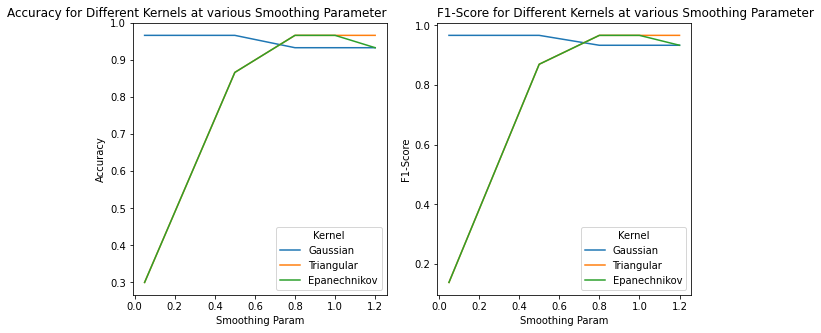

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('Accuracy for Different Kernels at various Smoothing Parameter',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('F1-Score for Different Kernels at various Smoothing Parameter',loc='left');

plt.show()

## Conclusion

Thus, we saw using PNN; we get high accuracy and f1 score with based on optimal kernel and bandwidth selection.  Also, the best-performing kernels were Gaussian, Triangular, and Epanechnikov kernels. The following are the key takeaways:

1. PNN enables us to build fast and less complex networks involving few layers.

2. We saw various combinations of kernel functions can be employed, and the optimal kernels can be chosen based on performance metrics.

3. PNN  is less time-consuming as it does not involve complex computations.

4. PNN can capture complex decision boundaries due to nonlinearity introduced by kernels which are present as activation functions.

Thus, PNN has wide scope and implementations in various domains.